In [1]:
import sys
sys.path.append("..")

from libs.data_manipulation import *
from libs.dim_reduction import *
from libs.feature_generation import *
from libs.clustering import *
from libs.convex_hull import *
from libs.alpha_shape import *
from libs.weight_generator import *

In [2]:
time_of_corner = 4285

In [3]:
england_df = compile_team_tracking_data("../data/H_EURO2024GERMANY","England")


In [28]:
data_df = extract_one_match(england_df, 1)

In [5]:
first_match = data_df[data_df["match_id"] == 1]
index_of_corner = first_match[first_match["Time [s]"].between(time_of_corner-1, time_of_corner+1)].index[0]

In [6]:
print(index_of_corner)

108791


In [26]:
function_1 = lambda x : 100 - x
function_2 = lambda x : 1/x
function_3 = lambda x : np.exp(-x)

In [29]:
function_1_results = most_similar_with_wasserstein(index_of_corner, data_df, function_1)
function_2_results = most_similar_with_wasserstein(index_of_corner, data_df, function_2)
function_3_results = most_similar_with_wasserstein(index_of_corner, data_df, function_3)

108791
108791
108791


In [9]:
print(function_1_results[:10])
print(function_2_results[:10])
print(function_3_results[:10])

[289, 2684, 2680, 288, 2682, 2681, 2683, 2679, 287, 2678]
[2096, 2101, 1174, 1000, 2102, 1175, 1001, 2642, 2103, 2641]
[1000, 1177, 2101, 1001, 2103, 2105, 2104, 2121, 1002, 2102]


In [16]:


rip_k_corner = ripley_k_by_indices(data_df, [index_of_corner])
rip_k_whole_match = ripley_k_by_indices(data_df.iloc[::48], data_df.iloc[::48].index.to_numpy())

In [20]:
rip_k_function_1 = ripley_k_by_indices(data_df, function_1_results[:10])
rip_k_function_2 = ripley_k_by_indices(data_df, function_2_results[:10])
rip_k_function_3 = ripley_k_by_indices(data_df, function_3_results[:10])

here
here
here
here
here


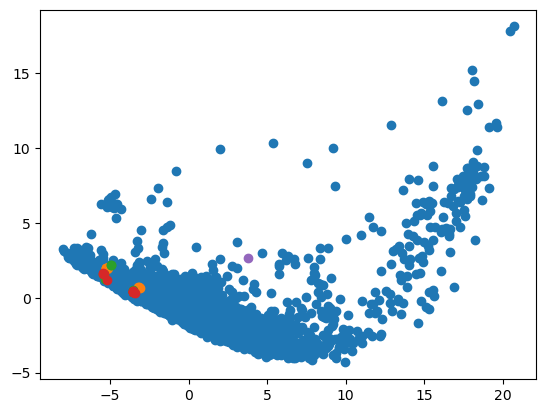

In [23]:
pca_obj = PCAObject(rip_k_whole_match)

components_match = pca_obj.transform(rip_k_whole_match)
components_corner = pca_obj.transform(rip_k_corner)
components_func_1 = pca_obj.transform(rip_k_function_1)
components_func_2 = pca_obj.transform(rip_k_function_2)
components_func_3 = pca_obj.transform(rip_k_function_3)



plt.scatter(components_match[:,0],components_match[:,1])
plt.scatter(components_func_1[:,0], components_func_1[:,1])
plt.scatter(components_func_2[:,0], components_func_2[:,1])
plt.scatter(components_func_3[:,0], components_func_3[:,1])
plt.scatter(components_corner[:,0], components_corner[:,1])
plt.show()


In [24]:
generate_folder("function_1_top_10")
generate_folder("function_2_top_10")
generate_folder("function_3_top_10")
generate_folder("target_situation")
k=10

generate_pitches_from_start_indices(function_1_results[:k], data_df, "function_1_top_10",48, 48)
generate_pitches_from_start_indices(function_2_results[:k], data_df, "function_2_top_10",48, 48)
generate_pitches_from_start_indices(function_3_results[:k], data_df, "function_3_top_10",48, 48)
generate_pitches_from_start_indices([index_of_corner], data_df, "target_situation",1, 1)


Folder 'function_1_top_10' does not exist.
Folder 'function_2_top_10' does not exist.
Folder 'function_3_top_10' does not exist.
